# Task 6.2 Exploring Relationships

### Contents
** **
Step 1:  Standard prerequisites, including library loading, path setup, and data import from Task 1.

Step 2:  Picking out variables suitable for exploratory visual analysis, based on the questions defined in Task 6.1.

Step 3:  Correlation matrix heatmap (colored).

Step 4:  Scatterplots for the variables with the strongest correlations, and examination of the nature of their relationships.

Step 5:  Pair plot of the entire data set.

Step 6:  Categorical plots.

Step 7:  Revisiting questions posed in Task 1.

Step 8:  Discussion of hypothesis (or lack thereof).

# Step 1:  Standard prerequisites, including library loading, path setup, and data import from Task 1.

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [3]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [4]:
# Import itertools to help loop through lots of things.
import itertools

In [5]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [6]:
# Set a PATH variable.

In [7]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [8]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [9]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [10]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [11]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Load our digested data from Task 1.

In [12]:
print(os.path.join(path, '02-Data', 'Prepared-Data', 'initial_plausible.Task-6.1.pkl'))

/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Prepared-Data/initial_plausible.Task-6.1.pkl


In [13]:
df = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'initial_plausible.Task-6.1.pkl'))

In [14]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7470749 entries, 0 to 7479164
Data columns (total 20 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   EventId                         object 
 1   Type                            object 
 2   Severity                        object 
 3   StartTime(UTC)                  object 
 4   EndTime(UTC)                    object 
 5   Precipitation(in)               float64
 6   TimeZone                        object 
 7   AirportCode                     object 
 8   LocationLat                     float64
 9   LocationLng                     float64
 10  City                            object 
 11  County                          object 
 12  State                           object 
 13  ZipCode                         float64
 14  StartTime(Epoch)                int64  
 15  EndTime(Epoch)                  int64  
 16  Duration(seconds)               int64  
 17  Duration(hours)            

In [15]:
df.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  StartTime(Epoch)  EndTime(Epoch)  \
0  Saguache  Saguache    CO  81149.0        1452122040      1452126840   
1  Saguache  Saguache    CO  81149.0        1452140040      1452142440   
2  Saguache  Saguache    CO  81149.0        1452146040      1452180840   
3  Saguache  Saguache    CO  81149.0        1452231240      1452232440   
4  Saguache  Saguache    CO  81149.0        1452261240      1452268440   

   Duration(seconds)  Duration(hours)  PrecipitationRate(inches/hour)  \
0               4800         1.333333                        0.000000   
1               2400         0.666667                        0.000000   
2              34800         9.666667                        0.003103   
3               1200         0.333333                        0.000000   
4               7200         2.000000                        0.000000   

  Disbelievable  
0           TBD  
1           TBD  
2           TBD  
3           TBD  
4           TBD

In [16]:
df.tail()

EventId   Type  Severity       StartTime(UTC)         EndTime(UTC)  \
7479160  W-7577193  Storm    Severe  2021-12-26 18:19:00  2021-12-26 18:29:00   
7479161  W-7577194   Snow     Light  2021-12-26 18:29:00  2021-12-26 18:38:00   
7479162  W-7577195   Snow     Light  2021-12-28 00:53:00  2021-12-28 02:27:00   
7479163  W-7577196   Snow  Moderate  2021-12-28 02:27:00  2021-12-28 03:09:00   
7479164  W-7577197   Snow     Light  2021-12-28 03:09:00  2021-12-28 03:19:00   

         Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
7479160               0.00  US/Mountain        KBVR      42.5833    -108.2833   
7479161               0.02  US/Mountain        KBVR      42.5833    -108.2833   
7479162               0.08  US/Mountain        KBVR      42.5833    -108.2833   
7479163               0.09  US/Mountain        KBVR      42.5833    -108.2833   
7479164               0.01  US/Mountain        KBVR      42.5833    -108.2833   

           City   County State  ZipCode  StartTime(Epoch)  EndTime(Epoch)  \
7479160  Lander  Fremont    WY  82520.0        1640542740      1640543340   
7479161  Lander  Fremont    WY  82520.0        1640543340      1640543880   
7479162  Lander  Fremont    WY  82520.0        1640652780      1640658420   
7479163  Lander  Fremont    WY  82520.0        1640658420      1640660940   
7479164  Lander  Fremont    WY  82520.0        1640660940      1640661540   

         Duration(seconds)  Duration(hours)  PrecipitationRate(inches/hour)  \
7479160                600         0.166667                        0.000000   
7479161                540         0.150000                        0.133333   
7479162               5640         1.566667                        0.051064   
7479163               2520         0.700000                        0.128571   
7479164                600         0.166667                        0.060000   

        Disbelievable  
7479160           TBD  
7479161           TBD  
7479162           TBD  
7479163           TBD  
7479164           TBD

In [17]:
df.shape

(7470749, 20)

In [18]:
df.dtypes

EventId                            object
Type                               object
Severity                           object
StartTime(UTC)                     object
EndTime(UTC)                       object
Precipitation(in)                 float64
TimeZone                           object
AirportCode                        object
LocationLat                       float64
LocationLng                       float64
City                               object
County                             object
State                              object
ZipCode                           float64
StartTime(Epoch)                    int64
EndTime(Epoch)                      int64
Duration(seconds)                   int64
Duration(hours)                   float64
PrecipitationRate(inches/hour)    float64
Disbelievable                      object
dtype: object

In [19]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable'],
      dtype='object')

In [20]:
df.describe(include='all')

EventId     Type Severity       StartTime(UTC)         EndTime(UTC)  \
count   7470749  7470749  7470749              7470749              7470749   
unique  7470749        7        6              1979673              1938878   
top         W-1     Rain    Light  2017-03-12 06:15:00  2016-03-13 06:15:00   
freq          1  4395051  4489044                  116                  103   
mean        NaN      NaN      NaN                  NaN                  NaN   
std         NaN      NaN      NaN                  NaN                  NaN   
min         NaN      NaN      NaN                  NaN                  NaN   
25%         NaN      NaN      NaN                  NaN                  NaN   
50%         NaN      NaN      NaN                  NaN                  NaN   
75%         NaN      NaN      NaN                  NaN                  NaN   
max         NaN      NaN      NaN                  NaN                  NaN   

        Precipitation(in)    TimeZone AirportCode   LocationLat   LocationLng  \
count        7.470749e+06     7470749     7470749  7.470749e+06  7.470749e+06   
unique                NaN           4        2071           NaN           NaN   
top                   NaN  US/Central        K3TH           NaN           NaN   
freq                  NaN     3094273       13499           NaN           NaN   
mean         8.186330e-02         NaN         NaN  3.873442e+01 -9.192901e+01   
std          3.704820e-01         NaN         NaN  5.465160e+00  1.347952e+01   
min          0.000000e+00         NaN         NaN  2.455710e+01 -1.245550e+02   
25%          0.000000e+00         NaN         NaN  3.449780e+01 -9.782830e+01   
50%          0.000000e+00         NaN         NaN  3.927500e+01 -8.982220e+01   
75%          5.000000e-02         NaN         NaN  4.295500e+01 -8.195650e+01   
max          1.471800e+02         NaN         NaN  4.894020e+01 -6.779280e+01   

                City   County    State       ZipCode  StartTime(Epoch)  \
count        7456264  7470749  7470749  7.411618e+06      7.470749e+06   
unique          1716     1100       48           NaN               NaN   
top     Jacksonville  Lincoln       TX           NaN               NaN   
freq           31068    76211   515813           NaN               NaN   
mean             NaN      NaN      NaN  5.249286e+04      1.545987e+09   
std              NaN      NaN      NaN  2.571006e+04      5.374878e+07   
min              NaN      NaN      NaN  1.022000e+03      1.451624e+09   
25%              NaN      NaN      NaN  3.131400e+04      1.499713e+09   
50%              NaN      NaN      NaN  5.401700e+04      1.546295e+09   
75%              NaN      NaN      NaN  7.352100e+04      1.590265e+09   
max              NaN      NaN      NaN  9.936200e+04      1.640995e+09   

        EndTime(Epoch)  Duration(seconds)  Duration(hours)  \
count     7.470749e+06       7.470749e+06     7.470749e+06   
unique             NaN                NaN              NaN   
top                NaN                NaN              NaN   
freq               NaN                NaN              NaN   
mean      1.545991e+09       4.617880e+03     1.282745e+00   
std       5.374880e+07       9.550683e+03     2.652967e+00   
min       1.451625e+09       6.000000e+01     1.666667e-02   
25%       1.499717e+09       1.200000e+03     3.333333e-01   
50%       1.546300e+09       2.400000e+03     6.666667e-01   
75%       1.590268e+09       4.620000e+03     1.283333e+00   
max       1.640995e+09       6.048000e+05     1.680000e+02   

        PrecipitationRate(inches/hour) Disbelievable  
count                     7.470749e+06       7470749  
unique                             NaN             1  
top                                NaN           TBD  
freq                               NaN       7470749  
mean                      1.681865e-01           NaN  
std                       6.835777e-01           NaN  
min                       0.000000e+00           NaN  
25%         

# Step 2:  Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.


In [21]:
# As I discussed in my Task 6.1 submission, both the City and ZipCode columns have some missing
# values, and arguably can be omitted, especially as we have County, State, and other location
# columns that suffice.
# I think I will keep the EventId column as a simple, unique identifier that could be useful
# for later sanity-checking, audits, or reference.
# I am on the fence about whether the TimeZone column could have a future use.  I will keep it.
# The other columns definitely seem appropriate to keep.
# TL;DR:  I am only going to drop the City and ZipCode columns for now.

In [22]:
df_no_city_zip = df.drop(columns = ['City', 'ZipCode'])

In [23]:
# A few sanity-checks of the new DataFrame.

In [24]:
df_no_city_zip.shape

(7470749, 18)

In [25]:
df_no_city_zip.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

     County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
0  Saguache    CO        1452122040      1452126840               4800   
1  Saguache    CO        1452140040      1452142440               2400   
2  Saguache    CO        1452146040      1452180840              34800   
3  Saguache    CO        1452231240      1452232440               1200   
4  Saguache    CO        1452261240      1452268440               7200   

   Duration(hours)  PrecipitationRate(inches/hour) Disbelievable  
0         1.333333                        0.000000           TBD  
1         0.666667                        0.000000           TBD  
2         9.666667                        0.003103           TBD  
3         0.333333                        0.000000           TBD  
4         2.000000                        0.000000           TBD

In [26]:
df_no_city_zip.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable'],
      dtype='object')

In [27]:
df_no_city_zip.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7470749 entries, 0 to 7479164
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   EventId                         object 
 1   Type                            object 
 2   Severity                        object 
 3   StartTime(UTC)                  object 
 4   EndTime(UTC)                    object 
 5   Precipitation(in)               float64
 6   TimeZone                        object 
 7   AirportCode                     object 
 8   LocationLat                     float64
 9   LocationLng                     float64
 10  County                          object 
 11  State                           object 
 12  StartTime(Epoch)                int64  
 13  EndTime(Epoch)                  int64  
 14  Duration(seconds)               int64  
 15  Duration(hours)                 float64
 16  PrecipitationRate(inches/hour)  float64
 17  Disbelievable              

# Step 3:  Create a correlation matrix heatmap (colored).

In [28]:
# I had already explored this a little bit in Task 6.1, but I will repeat on the smaller dataframe.

In [29]:
df_no_city_zip.corr()

Precipitation(in)  LocationLat  LocationLng  \
Precipitation(in)                        1.000000    -0.059686     0.041973   
LocationLat                             -0.059686     1.000000    -0.169520   
LocationLng                              0.041973    -0.169520     1.000000   
StartTime(Epoch)                        -0.000926    -0.016407     0.018561   
EndTime(Epoch)                          -0.000917    -0.016397     0.018557   
Duration(seconds)                        0.048637     0.054559    -0.020428   
Duration(hours)                          0.048637     0.054559    -0.020428   
PrecipitationRate(inches/hour)           0.511531    -0.095588     0.058979   

                                StartTime(Epoch)  EndTime(Epoch)  \
Precipitation(in)                      -0.000926       -0.000917   
LocationLat                            -0.016407       -0.016397   
LocationLng                             0.018561        0.018557   
StartTime(Epoch)                        1.000000        1.000000   
EndTime(Epoch)                          1.000000        1.000000   
Duration(seconds)                       0.001647        0.001825   
Duration(hours)                         0.001647        0.001825   
PrecipitationRate(inches/hour)          0.011984        0.011971   

                                Duration(seconds)  Duration(hours)  \
Precipitation(in)                        0.048637         0.048637   
LocationLat                              0.054559         0.054559   
LocationLng                             -0.020428        -0.020428   
StartTime(Epoch)                         0.001647         0.001647   
EndTime(Epoch)                           0.001825         0.001825   
Duration(seconds)                        1.000000         1.000000   
Duration(hours)                          1.000000         1.000000   
PrecipitationRate(inches/hour)          -0.073822        -0.073822   

                                PrecipitationRate(inches/hour)  
Precipitation(in)                                     0.511531  
LocationLat                                          -0.095588  
LocationLng                                           0.058979  
StartTime(Epoch)                                      0.011984  
EndTime(Epoch)                                        0.011971  
Duration(seconds)                                    -0.073822  
Duration(hours)                                      -0.073822  
PrecipitationRate(inches/hour)                        1.000000

### Here is the correlation heatmap using the code I worked out in Task 6.1.

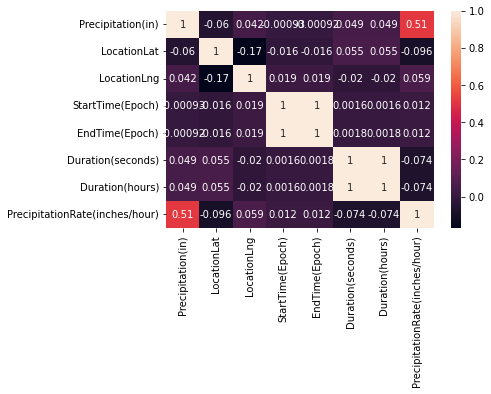

In [30]:
sns.heatmap(df_no_city_zip.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

### Here is the correlation heatmap using code derived from the example in the current task, Task 6.2.

#### First with raw matplotlib.

In [31]:
# NOTE:  The example from the Exercise needed to be tweaked, in order to omit from the axes
# the columns that are not amenable to correlation.

In [32]:
df_no_city_zip.shape[1]

18

In [33]:
df_no_city_zip.corr().shape[1]

8

In [34]:
df_no_city_zip.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable'],
      dtype='object')

In [35]:
df_no_city_zip.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

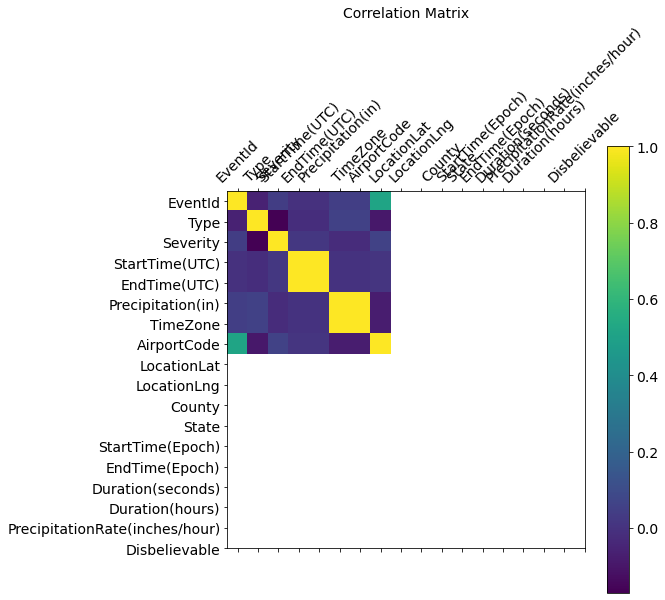

In [36]:
# Initial adaptation, with the extra columns distorting the axes.
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_no_city_zip.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_no_city_zip.shape[1]), df_no_city_zip.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_no_city_zip.shape[1]), df_no_city_zip.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

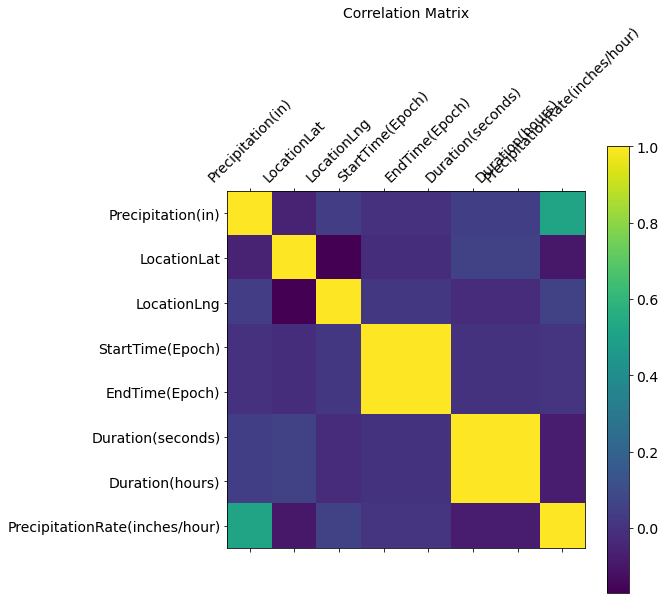

In [37]:
# A slight tweak to the plt.xticks and plt.yticks definitions removes the inappropriate columns.
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_no_city_zip.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_no_city_zip.corr().shape[1]), df_no_city_zip.corr().columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_no_city_zip.corr().shape[1]), df_no_city_zip.corr().columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
# REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
# plt.savefig() first, or else your file will be blank!
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-matplotlib.png'), facecolor='white')
plt.show()

#### Now with seaborn.
#### NOTE:  I'm trying to be "lazy" in creating my subset dataframe, by avoiding typing/pasting all the specific column names, like they did in the Exercice 6.2 example.  After a couple of sanity checks, I *think* it works.

In [38]:
df_no_city_zip.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)'],
      dtype='object')

In [39]:
df_no_city_zip.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)'],
      dtype='object')

In [40]:
df_subset = df_no_city_zip[df_no_city_zip.corr().columns]

In [41]:
df_subset.shape

(7470749, 8)

In [42]:
df_subset.head()

Precipitation(in)  LocationLat  LocationLng  StartTime(Epoch)  \
0               0.00      38.0972    -106.1689        1452122040   
1               0.00      38.0972    -106.1689        1452140040   
2               0.03      38.0972    -106.1689        1452146040   
3               0.00      38.0972    -106.1689        1452231240   
4               0.00      38.0972    -106.1689        1452261240   

   EndTime(Epoch)  Duration(seconds)  Duration(hours)  \
0      1452126840               4800         1.333333   
1      1452142440               2400         0.666667   
2      1452180840              34800         9.666667   
3      1452232440               1200         0.333333   
4      1452268440               7200         2.000000   

   PrecipitationRate(inches/hour)  
0                        0.000000  
1                        0.000000  
2                        0.003103  
3                        0.000000  
4                        0.000000

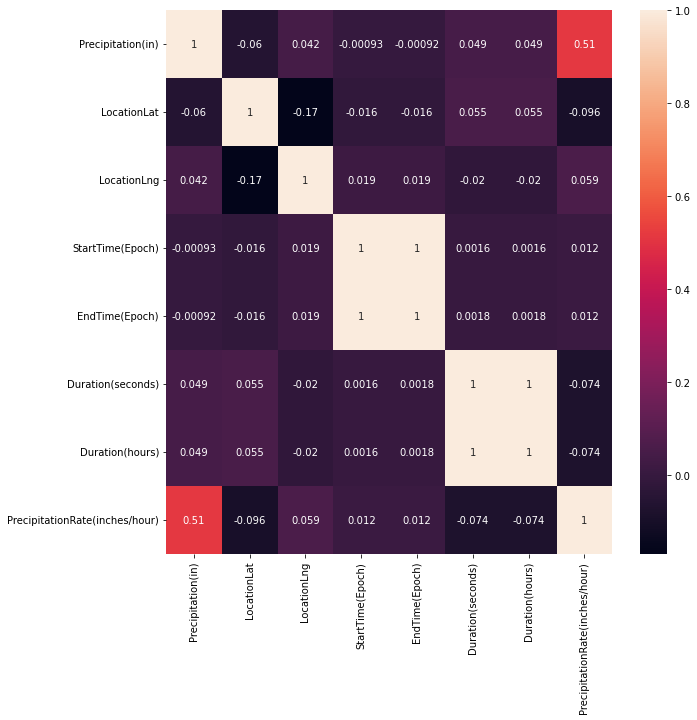

In [43]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [44]:
# Save the seaborn correlation heatmap.
corr.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 3a) Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


### Answer:
### There don't seem to be any insightful correlations among these variables.
### Obviously, precipitation rates and precipitation totals have a strong correlation, and the various time-related variables correlate, of course.
### Other than those, though, nothing quite makes the threshold of even a weak relationship (+/- 0.1).
### The closest are slight inverse relationships that Precipitation Rate has with Latitude (-0.096) and with event Duration (-0.074); the inverse relationship with Latitude might be worth investigating, but the inverse relationship with duration is counterintuitive.

# Step 4:  Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

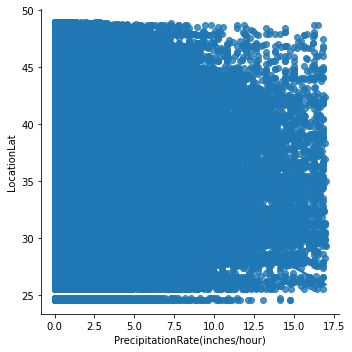

In [45]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "LocationLat" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'LocationLat', data = df_subset)
# Save the seaborn scatterplot.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-LocLat-seaborn.png'), facecolor='white', bbox_inches='tight')

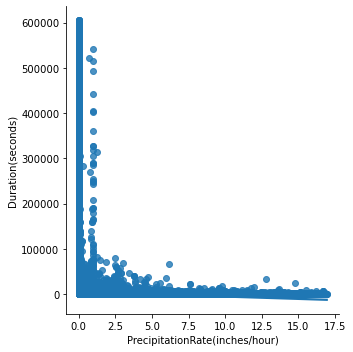

In [46]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "Duration(seconds)" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'Duration(seconds)', data = df_subset)
# Save the seaborn scatterplot.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-DureSec-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 4a) Discuss the output in a markdown cell.

### Answer:
### There truly seems to be no linear correlation to discuss so far.
### Hopefully, once I start to investigate how the data acts over time, some good correlations will appear.

# Step 5:  Create a pair plot of the entire data set.

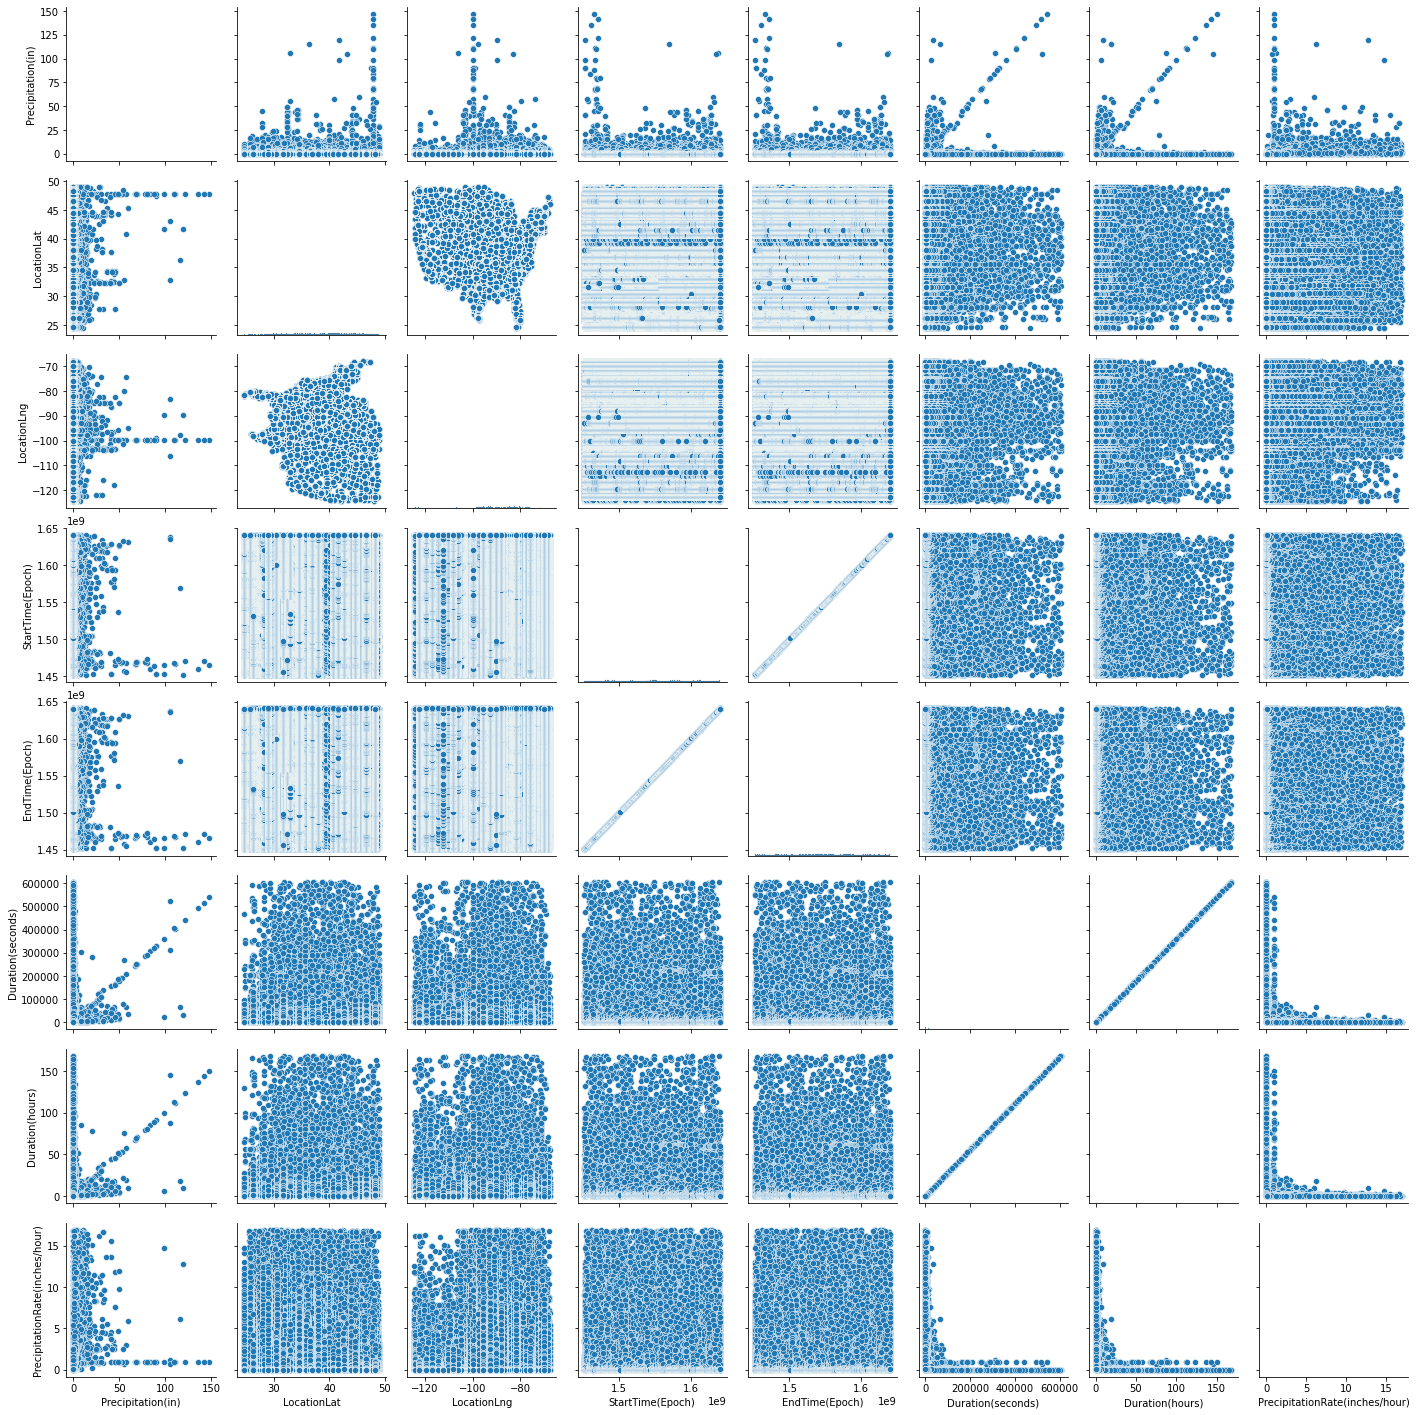

In [47]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset)

In [48]:
# Save the seaborn pairplot.
pair_plot.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-pairplot.png'), facecolor='white', bbox_inches='tight')

### Step 5a) Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


### Answer:
### The only plots that show correlation are those comparing total precipitation amounts - the Precipitation(in) column - with the Duration columns.  However, while a clear line of correlation is visible, there are so many outliers that we don't see high correlation coefficients.  *This could mean that we need to separate the data further, somehow.*
### On a side note, it is reassuring to see that the scatterplots of Location Latitude vs. Location Longitude resemble maps of the 48 contiguous United States.  This would appear to confirm that we have fairly good geographical representation.
### Hopefully, once I start to investigate how the data acts over time, more correlations will appear.

# Step 6:  Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

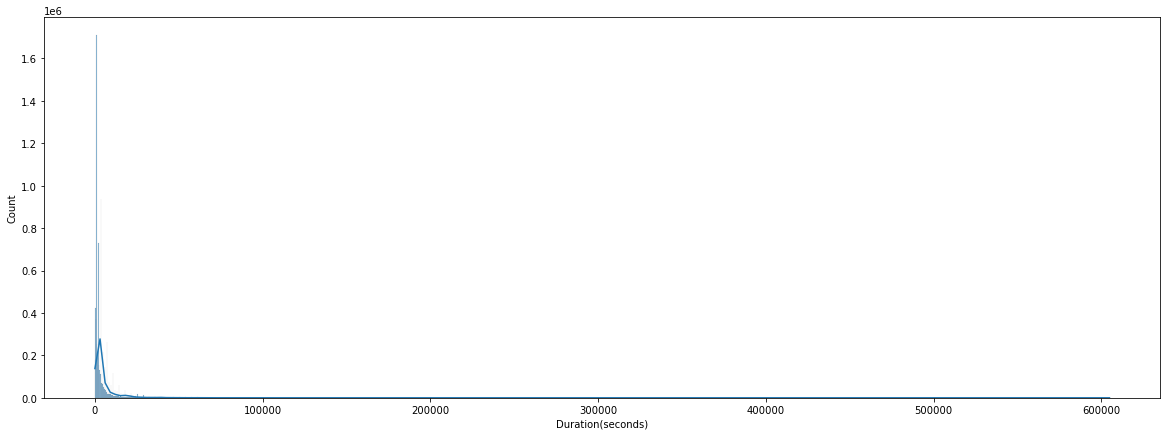

In [49]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset['Duration(seconds)'], bins = 2000, kde = True)

### Let's focus the histogram on durations of less than twelve hours (43,200 seconds).

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

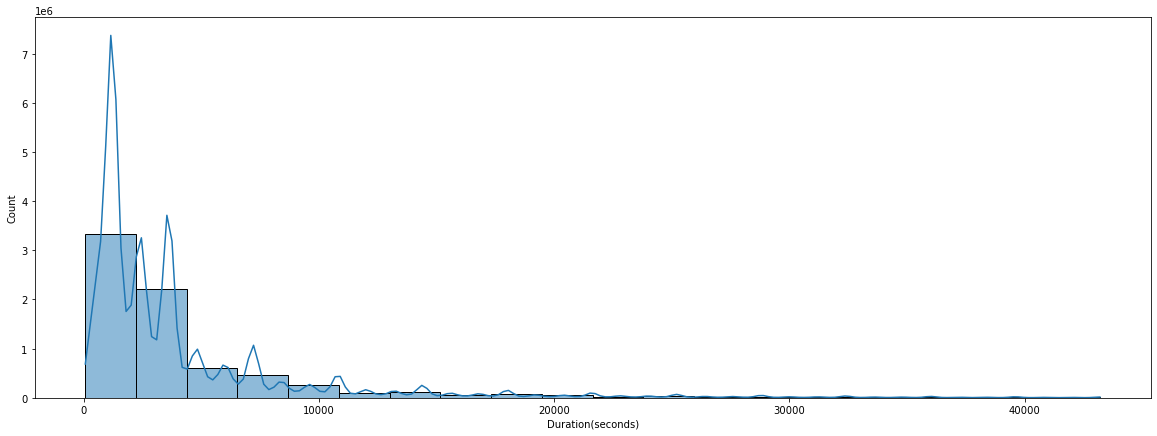

In [50]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset.loc[df_subset['Duration(seconds)'] <= 43200]['Duration(seconds)'], bins = 20, kde = True)

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

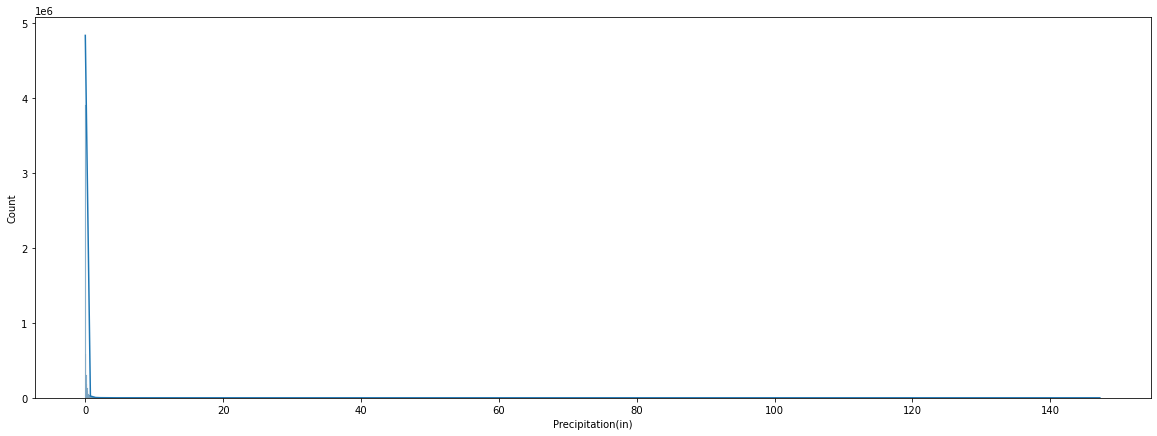

In [51]:
# Use a histogram to visualize the distribution of the 'Precipitation(in)' variable.
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df_no_city_zip' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_no_city_zip.loc[(df_no_city_zip['Type'] == 'Precipitation') | (df_no_city_zip['Type'] == 'Rain') | (df_no_city_zip['Type'] == 'Snow')]['Precipitation(in)'], bins = 2000, kde = True)

### Can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [52]:
df_no_city_zip.loc[(df_no_city_zip['Type'] == 'Precipitation') | (df_no_city_zip['Type'] == 'Rain') | (df_no_city_zip['Type'] == 'Snow')]['Precipitation(in)'].describe()

count    5.499275e+06
mean     1.112111e-01
std      4.280179e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-02
75%      1.000000e-01
max      1.471800e+02
Name: Precipitation(in), dtype: float64

### Unfortunately, the vast majority of even "wet" events have precipitation amounts under one-tenth of an inch.  It is difficult to feel confident in such measurements.

### How about *rates* of precipitation, then?

<AxesSubplot:xlabel='PrecipitationRate(inches/hour)', ylabel='Count'>

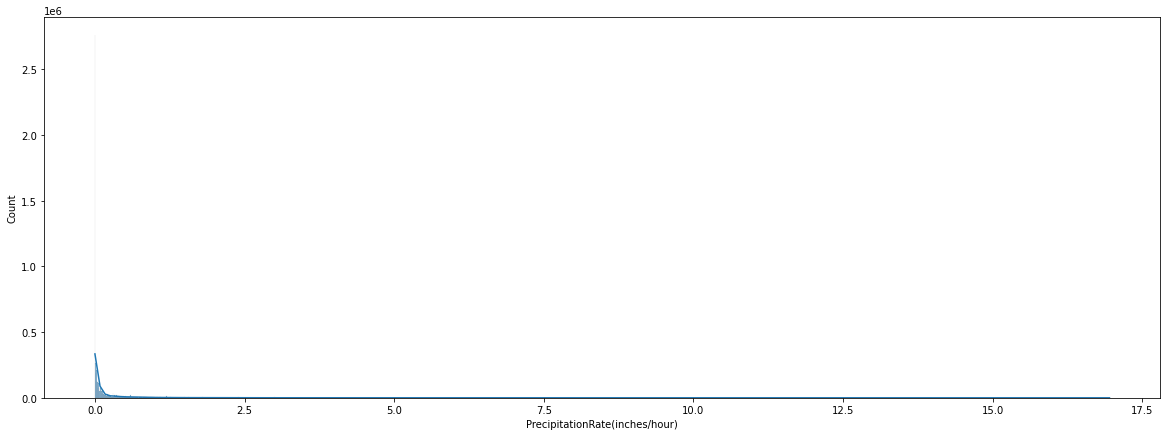

In [53]:
# Use a histogram to visualize the distribution of the 'PrecipitationRate(inches/hour)' variable. 
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df_no_city_zip' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
#sns.histplot(df_subset['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)
sns.histplot(df_no_city_zip.loc[(df_no_city_zip['Type'] == 'Precipitation') | (df_no_city_zip['Type'] == 'Rain') | (df_no_city_zip['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)

### Again, we have wide-ranging values skewed toward zero.
### Again, can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [54]:
df_no_city_zip.loc[(df_no_city_zip['Type'] == 'Precipitation') | (df_no_city_zip['Type'] == 'Rain') | (df_no_city_zip['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'].describe()

count    5.499275e+06
mean     2.284809e-01
std      7.880484e-01
min      0.000000e+00
25%      0.000000e+00
50%      7.792208e-03
75%      1.050000e-01
max      1.695000e+01
Name: PrecipitationRate(inches/hour), dtype: float64

### Unfortunately, the majority of even "wet" events also have precipitation *rates* under one-tenth of an inch per hour.  It is difficult to feel confident in such measurements.

# Step 7:  Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### All questions raisde in Task 6.1 require analyzing the data over time, which we have not yet done.
### Here are the questions:
### 1) Have the frequencies, mean durations, or other characteristics of particular types of events changed over time?
### 2) How closely do latitude and longitude correlate with the frequency of particular types of events?
### 3) Do any correlation coefficients change significantly from year to year?

# Step 8:  Define any hypotheses that you can at this point. You’ll be testing these later on.

### The hypotheses will depend on time-based analysis, as well.  The current data, without correlations, does not present any obvious hypothesis to test.

In [55]:
# Let's save the new Dataframes created in this Task.

In [56]:
df_no_city_zip.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'plausible_no_cities_or_zipcodes.Task-6.2.pkl'))

In [57]:
df_subset.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'numerical_subset_of_plausible_no_cities_or_zipcodes.Task-6.1.pkl'))

# Addendum:  Splitting the dataset by Climatic Region
### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## The dataset studied in Tasks 6.1 and 6.2 may be better analyzed by dividing based on the climatic region of each state.

In [58]:
# Quick sanity check, first:
df['State'].value_counts().sort_index()

AL    171906
AR    136621
AZ     55990
CA    309319
CO    169740
CT     41843
DE     14365
FL    325093
GA    250222
IA    210951
ID     85809
IL    243265
IN    133312
KS    103809
KY    115830
LA    194288
MA    107741
MD     68003
ME     78960
MI    358498
MN    383531
MO    117590
MS    124726
MT     90510
NC    317016
ND    135945
NE    126652
NH     65481
NJ     68963
NM     72682
NV     31288
NY    180464
OH    183892
OK    157102
OR    152939
PA    179901
RI     22387
SC    182163
SD     80464
TN     70061
TX    515813
UT     39945
VA    231819
VT     50133
WA    191235
WI    272456
WV     88503
WY    161523
Name: State, dtype: int64

In [59]:
# Define our regions based on the description above; our dataset uses two-letter abbreviations, which I generated manually.

In [60]:
reg_1_ne = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
reg_2_umw = ['IA', 'MI', 'MN', 'WI']
reg_3_ov = ['IL', 'IN', 'KY', 'MO', 'OH', 'TN', 'WV']
reg_4_se = ['AL', 'FL', 'GA', 'NC', 'SC', 'VA']
reg_5_nrap = ['MT', 'NE', 'ND', 'SD', 'WY']
reg_6_s = ['AR', 'KS', 'LA', 'MS', 'OK', 'TX']
reg_7_sw = ['AZ', 'CO', 'NM', 'UT']
reg_8_nw = ['ID', 'OR', 'WA']
reg_9_w = ['CA', 'NV']

In [61]:
# Build a new 'Region' column based on matches for these groups of states.

In [62]:
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_1_ne), 'Region'] = 'Northeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_2_umw), 'Region'] = 'Upper Midwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_3_ov), 'Region'] = 'Ohio Valley'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_4_se), 'Region'] = 'Southeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_5_nrap), 'Region'] = 'Northern Rockies and Plains'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_6_s), 'Region'] = 'South'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_7_sw), 'Region'] = 'Southwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_8_nw), 'Region'] = 'Northwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_9_w), 'Region'] = 'West'

In [63]:
# Let's assign this modified dataframe a new name.

In [64]:
df_all_states_regions = df_no_city_zip

In [65]:
# Quick sanity-checks of the new dataframe.

In [66]:
df_all_states_regions.shape

(7470749, 19)

In [67]:
df_all_states_regions.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

     County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
0  Saguache    CO        1452122040      1452126840               4800   
1  Saguache    CO        1452140040      1452142440               2400   
2  Saguache    CO        1452146040      1452180840              34800   
3  Saguache    CO        1452231240      1452232440               1200   
4  Saguache    CO        1452261240      1452268440               7200   

   Duration(hours)  PrecipitationRate(inches/hour) Disbelievable     Region  
0         1.333333                        0.000000           TBD  Southwest  
1         0.666667                        0.000000           TBD  Southwest  
2         9.666667                        0.003103           TBD  Southwest  
3         0.333333                        0.000000           TBD  Southwest  
4         2.000000                        0.000000           TBD  Southwest

In [68]:
df_all_states_regions.tail()

EventId   Type  Severity       StartTime(UTC)         EndTime(UTC)  \
7479160  W-7577193  Storm    Severe  2021-12-26 18:19:00  2021-12-26 18:29:00   
7479161  W-7577194   Snow     Light  2021-12-26 18:29:00  2021-12-26 18:38:00   
7479162  W-7577195   Snow     Light  2021-12-28 00:53:00  2021-12-28 02:27:00   
7479163  W-7577196   Snow  Moderate  2021-12-28 02:27:00  2021-12-28 03:09:00   
7479164  W-7577197   Snow     Light  2021-12-28 03:09:00  2021-12-28 03:19:00   

         Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
7479160               0.00  US/Mountain        KBVR      42.5833    -108.2833   
7479161               0.02  US/Mountain        KBVR      42.5833    -108.2833   
7479162               0.08  US/Mountain        KBVR      42.5833    -108.2833   
7479163               0.09  US/Mountain        KBVR      42.5833    -108.2833   
7479164               0.01  US/Mountain        KBVR      42.5833    -108.2833   

          County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
7479160  Fremont    WY        1640542740      1640543340                600   
7479161  Fremont    WY        1640543340      1640543880                540   
7479162  Fremont    WY        1640652780      1640658420               5640   
7479163  Fremont    WY        1640658420      1640660940               2520   
7479164  Fremont    WY        1640660940      1640661540                600   

         Duration(hours)  PrecipitationRate(inches/hour) Disbelievable  \
7479160         0.166667                        0.000000           TBD   
7479161         0.150000                        0.133333           TBD   
7479162         1.566667                        0.051064           TBD   
7479163         0.700000                        0.128571           TBD   
7479164         0.166667                        0.060000           TBD   

                              Region  
7479160  Northern Rockies and Plains  
7479161  Northern Rockies and Plains  
7479162  Northern Rockies and Plains  
7479163  Northern Rockies and Plains  
7479164  Northern Rockies and Plains

In [69]:
# Save the df_all_states_regions dataframe for future loading, even though I doubt we'll use it.

In [70]:
df_all_states_regions.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_all_states_regions.Task-6.2.pkl'))

## Split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the single-CPU bottleneck.

In [71]:
for region_name in df_all_states_regions['Region'].unique():
    # Replace uppercase letters with lowercase letters
    region_code = region_name.lower()
    
    # Replace spaces with underscores
    region_code = region_code.replace(' ', '_')
    
    # Create a new dataframe and assign it to a dynamically generated variable name
    globals()['df_' + region_code] = df_all_states_regions.loc[df_all_states_regions['Region'] == region_name]
    
    print ('df_' + region_code)
    print(globals()['df_' + region_code].shape)
    
    # Save each new dataframe to a pickle file.
    globals()['df_' + region_code].to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))
    print()

df_southwest
(338357, 19)

df_south
(1232359, 19)

df_upper_midwest
(1225436, 19)

df_northwest
(429983, 19)

df_northern_rockies_and_plains
(595094, 19)

df_northeast
(878241, 19)

df_ohio_valley
(952453, 19)

df_southeast
(1478219, 19)

df_west
(340607, 19)

